# THESIS - Fisher Information multiple items

Collection of random plots for chapter 5.



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import functools
from experimentlauncher import ExperimentLauncher
from dataio import DataIO
import plots_experimental_data

import re
import inspect
import imp

import utils
import load_experimental_data
import highdimensionnetwork
import hierarchicalrandomnetwork

import computations_marginalfisherinfo_marginalposterior_2d_nstim
import computations_marginalfisherinfo_marginalposterior_2d

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

=== FileIO ready: ./Data/compute_fimarg_2dnstim-54351896-f73e-4811-b8cc-fda93fa42913 ===
0.0%, -- 
 0 [ 0.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.] [ 0.  0.]
1.0%, 3m46s 
 1000 [ 0.21119833  0.46352959  0.74147564  1.09621701  1.52171209] [ 0.  0.  0.  0.  0.] [ 1.63447809  0.27000187]
2.0%, 2m46s 
 2000 [ 0.21130388  0.46319556  0.75376423  1.10669322  1.52658081] [ 0.  0.  0.  0.  0.] [ 1.63447809  0.27000187]
3.0%, 2m33s 
 3000 [ 0.21133909  0.46233557  0.75485462  1.11788404  1.53589488] [ 0.  0.  0.  0.  0.] [ 1.63447809  0.27000187]
4.0%, 2m54s 
 4000 [ 0.21135669  0.4598869   0.75816324  1.1185063   1.53639198] [  1.96135602e-15   5.20512530e-02   2.86047165e-01   4.57288759e-01
   6.92661297e-01] [ 1.22559018  0.20463973]
5.0%, 2m47s 
 5000 [ 0.21136726  0.45930044  0.757428    1.11854228  1.53666064] [  2.50659041e-15   7.57695992e-02   2.95804504e-01   5.15769757e-01
   7.93800902e-01] [ 1.22559018  0.20463973]
6.0%, 2m39s 
 6000 [ 0.2113743   0.45886775  0.75825925  1.11855855

43.0%, 2m12s 
 43000 [ 0.21140462  0.45940203  0.75533751  1.11030396  1.53580267] [  8.35133279e-14   1.81146275e-01   4.62398021e-01   9.05530852e-01
   1.48728408e+00] [ 1.22413675  0.20429957]
44.0%, 2m9s 
 44000 [ 0.21140473  0.45935453  0.75532489  1.11035326  1.53579397] [  8.25604993e-14   1.81155730e-01   4.62898118e-01   9.04270710e-01
   1.48559157e+00] [ 1.22413675  0.20429957]
45.0%, 2m7s 
 45000 [ 0.21140484  0.45924966  0.75508509  1.1104413   1.53525268] [  8.16427528e-14   1.80966669e-01   4.61983788e-01   9.03799372e-01
   1.48059708e+00] [ 1.22413675  0.20429957]
46.0%, 2m7s 
 46000 [ 0.21140494  0.45918306  0.75506728  1.11013578  1.5346883 ] [  8.07740102e-14   1.80178895e-01   4.61003417e-01   9.00059271e-01
   1.47988715e+00] [ 1.22464258  0.20423239]
47.0%, 2m4s 
 47000 [ 0.21140504  0.45901336  0.75496984  1.11014796  1.53453952] [  7.99656302e-14   1.79070887e-01   4.61249261e-01   9.04170674e-01
   1.48090224e+00] [ 1.22464258  0.20423239]
48.0%, 2m2s 
 48000

85.0%, 43s 
 85000 [ 0.21140705  0.4595331   0.75450196  1.11025624  1.53498138] [  9.91727637e-14   1.84219597e-01   4.73375819e-01   9.86037255e-01
   1.61350093e+00] [ 1.22455425  0.20426909]
86.0%, 41s 
 86000 [ 0.21140708  0.45954809  0.75446844  1.11049094  1.53492661] [  1.00308838e-13   1.84006963e-01   4.73278776e-01   9.93111635e-01
   1.61845235e+00] [ 1.22455425  0.20426909]
87.0%, 37s 
 87000 [ 0.2114071   0.45950442  0.75435141  1.10983108  1.5339153 ] [  1.01447125e-13   1.83594834e-01   4.72484931e-01   9.89314483e-01
   1.61210699e+00] [ 1.22455425  0.20426909]
88.0%, 35s 
 88000 [ 0.21140713  0.45950532  0.75437959  1.10951963  1.53320067] [  1.02586604e-13   1.83327023e-01   4.72896948e-01   9.87362102e-01
   1.60767713e+00] [ 1.22398148  0.20428727]
89.0%, 33s 
 89000 [ 0.21140716  0.4595616   0.75433338  1.1092428   1.53303592] [  1.03726340e-13   1.83735759e-01   4.72128396e-01   9.85553586e-01
   1.60588929e+00] [ 1.22398148  0.20428727]
90.0%, 29s 
 90000 [ 0.21

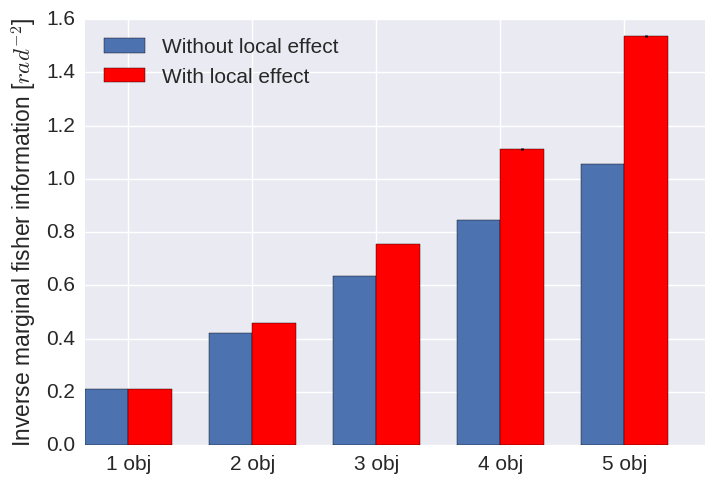

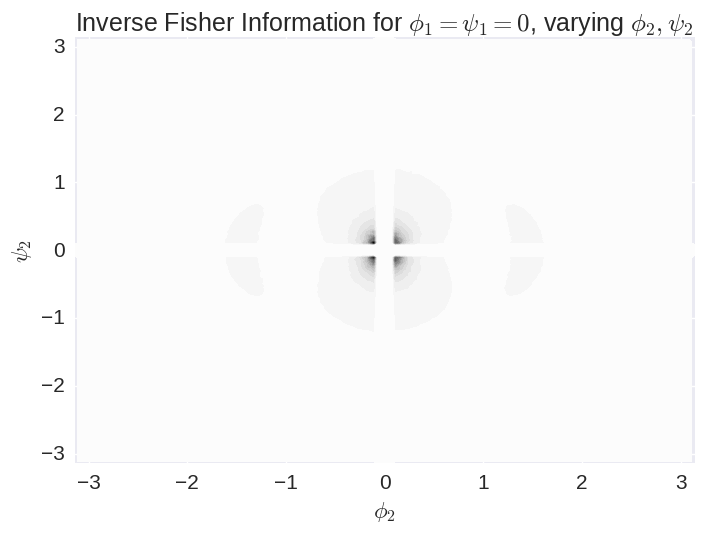

In [3]:
with io.capture_output(display=False, stdout=True) as captured:
    all_vars = computations_marginalfisherinfo_marginalposterior_2d_nstim.main(to_plot=[2])

In [14]:
dataio = DataIO(label='marginal_fisher_information', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Experiments/thesis_plots/multiple_objects')

=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Experiments/thesis_plots/multiple_objects/marginal_fisher_information-d17b0e1b-e22f-4633-94a8-0d80518e6359 ===


In [7]:
item2_positions = np.array(all_vars['item2_positions'])
all_inv_FI_2obj = np.array(all_vars['all_inv_FI_2obj'])

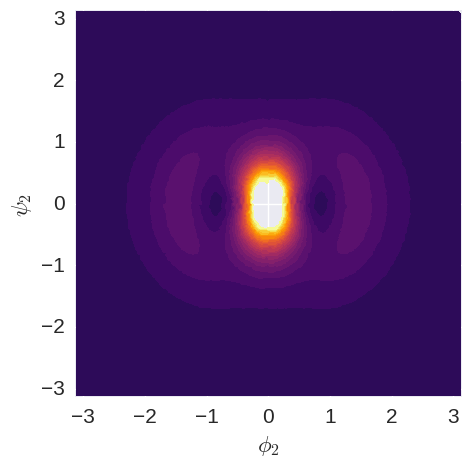

In [33]:
min_distance = 0.001

cmap = plt.cm.get_cmap("inferno") #bone_r
cmap.set_under("magenta")
cmap.set_over("yellow")


min_distance_fct = lambda x, min_distance=0.1: np.abs(x) < min_distance
min_distance_fct_part = functools.partial(
    min_distance_fct, min_distance=min_distance)

levels = np.logspace(-0.5, 0.3, 30)

f, ax = plt.subplots(figsize=(5, 5))
utils.contourf_interpolate_data(
    item2_positions,
    all_inv_FI_2obj,
    xlabel='$\phi_2$',
    ylabel='$\psi_2$',
#     title='Inverse Fisher Information for $\phi_1 = \psi_1 = 0$, varying $\phi_2, \psi_2$',
    show_colorbar=False,
    show_scatter=False,
#     mask_x_condition=min_distance_fct_part,
#     mask_y_condition=min_distance_fct_part,
    interpolation_method='nearest', 
#     contour_numlevels=20,
    log_scale=True,
    levels=levels,
    ax_handle=ax,
    cmap=cmap
)
# plt.axis('equal')


# f.savefig(dataio.create_formatted_filename('contourf_log_2items_{label}_{unique_id}.pdf'))

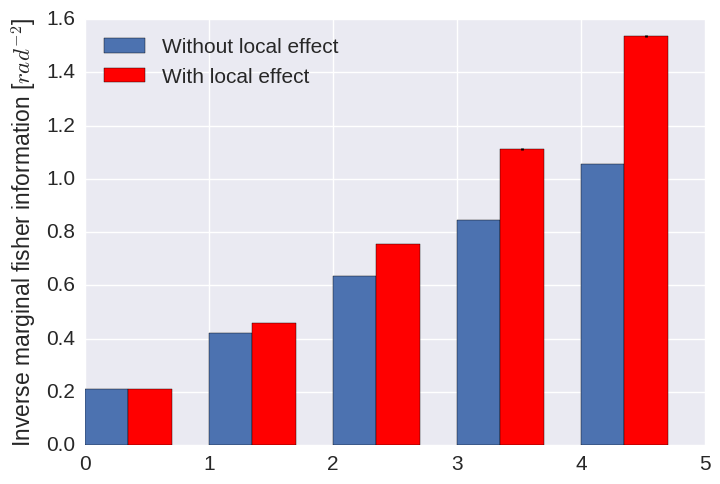

In [29]:
n_items = all_vars['n_items']
FI_all_obj_cum = all_vars['FI_all_obj_cum']
inv_FI_all_obj_var_cum = all_vars['inv_FI_all_obj_var_cum']
FI_all_obj_var_cum = all_vars['FI_all_obj_var_cum']
inv_FI_allobj_cum = all_vars['inv_FI_allobj_cum']
n_samples = all_vars['n_samples']
i = all_vars['i']


f2, ax2 = plt.subplots()
width = 0.35
rects1 = ax2.bar(
    np.arange(n_items),
    (FI_all_obj_cum * n_samples / (i + 1.)),
    width=width,
    yerr=np.sqrt(FI_all_obj_var_cum * n_samples /
                 (i + 1.)) / np.sqrt(i + 1),
    error_kw=dict(elinewidth=2, ecolor='black'))
rects2 = ax2.bar(
    np.arange(n_items) + width,
    inv_FI_allobj_cum * n_samples / (i + 1),
    width=width,
    yerr=np.sqrt(inv_FI_all_obj_var_cum * n_samples /
                 (i + 1)) / np.sqrt(i + 1),
    color='r',
    error_kw=dict(elinewidth=2, ecolor='black'))
ax2.set_xticks(
    np.arange(n_items) + width,
    ['%d obj' % it for it in xrange(1, n_items + 1)])
# plt.errorbar(np.arange(1, n_items+1), inv_FI_allobj_cum, yerr=inv_FI_all_obj_var_cum, fmt='.')
ax2.legend(
    (rects1[0], rects2[0]),
    ('Without local effect', 'With local effect'),
    loc='best')
ax2.set_ylabel('Inverse marginal fisher information [$rad^{-2}$]')


# dataio.save_current_figure(
#     'bars_IF_%dobj_{label}_{unique_id}.pdf' % (n_items))
f2.savefig(dataio.create_formatted_filename('items_effect_{label}_{unique_id}.pdf'))